# Implicit orthogonal regression

Estimate the parameters of an ellipse from a set of coordinates.

$$\begin{align*}
f(\bm{\beta}, \bm{X}) & = \frac{\left[(x-x_0)\cos\theta + (y-y_0)\sin\theta\right]^2}{a^2} \\
& + \frac{\left[(y-y_0)\cos\theta -(x-x_0)\sin\theta\right]^2}{b^2} - 1 = 0
\end{align*}$$

$$ X = (x,y) $$

$$ \bm{\beta} = (x_0, y_0, a, b, \theta) $$

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

from odrpack import odr

First, we define the observed data and the model function. 

In [2]:
# Each row represents a point (x, y) of the ellipse
X = [[0.50, -0.12],
     [1.20, -0.60],
     [1.60, -1.00],
     [1.86, -1.40],
     [2.12, -2.54],
     [2.36, -3.36],
     [2.44, -4.00],
     [2.36, -4.75],
     [2.06, -5.25],
     [1.74, -5.64],
     [1.34, -5.97],
     [0.90, -6.32],
     [-0.28, -6.44],
     [-0.78, -6.44],
     [-1.36, -6.41],
     [-1.90, -6.25],
     [-2.50, -5.88],
     [-2.88, -5.50],
     [-3.18, -5.24],
     [-3.44, -4.86]]

# We need shape (2, n)
X = np.array(X).T

# Y is not used, but is (currently) required by odr
Y = np.full(X.shape[-1], np.nan)

In [3]:
def f(beta: np.ndarray, X: np.ndarray) -> np.ndarray:
    x0, y0, a, b, theta = beta
    x, y = X
    return ((x - x0)*np.cos(theta) + (y - y0)*np.sin(theta))**2 / a**2 \
         + ((y - y0)*np.cos(theta) - (x - x0)*np.sin(theta))**2 / b**2 \
         - 1

Then, we define a plausible initial guess $\bm{\beta_0}$ for the model parameters, as well as the corresponding bounds.

In [4]:
beta0 = np.array([0., 0., 1., 1., 0.])

lower = np.array([-1e2, -1e2,  0.,  0., -np.pi/2.])
upper = np.array([+1e2, +1e2, 1e2, 1e2, +np.pi/2])

Here, we expect the measurement error to be the same across both $X$ coordinates, so a special weighting scheme is unnecessary.

In [5]:
wd = 1.

We can now launch the regression! As the problem is implicit, we set `job=1`. If you want to see a brief computation report, set `iprint=1001`.

In [6]:
sol = odr(f, beta0, Y, X, lower=lower, upper=upper, wd=wd, job=1)

The result is packed in a `OdrResult` dataclass. Let's check the solution convergence and the estimated model parameters.

In [7]:
sol.stopreason

'Parameter convergence.'

In [8]:
sol.beta

array([-0.99938378, -2.93104604,  3.86422941,  3.15663853, -0.90359002])

All fine! Let's plot the solution.

Text(0, 0.5, 'y')

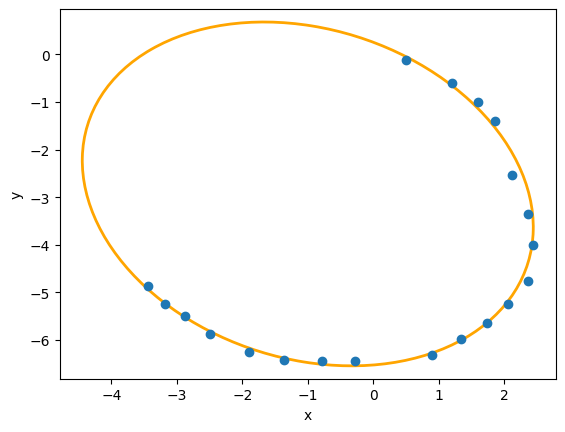

In [9]:
fig, ax = plt.subplots()

# Plot observed data
ax.plot(*X, 'o')

# Plot fitted ellipse
x0, y0, a, b, theta = sol.beta
ellipse = Ellipse((x0, y0), width=2*a, height=2*b, angle=np.degrees(theta),
                  facecolor='none', edgecolor='orange', linewidth=2)
ax.add_patch(ellipse)
ax.set_xlabel('x')
ax.set_ylabel('y')